In [1]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference
import matplotlib.pyplot as plt

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
# Plotting style setup
plt.style.use('seaborn-darkgrid')
plt.rcParams['legend.frameon'] = True
plt.rcParams['font.size'] = 12.0
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [3]:
# Lund et al. (2017)
nu_max = (2561.3, 5.6)  # in microhertz
delta_nu = (116.93, 0.01)   # in microhertz
teff = (5750, 50)    # in Kelvin

In [4]:
from astroquery.vizier import Vizier

In [5]:
v = Vizier(row_limit=-1)
tables = v.query_constraints("J/ApJ/835/172/table6", KIC="12069449")

WARNING[2022-03-07 12:17:50,397]: UnitsWarning: Unit 'ppm' not supported by the VOUnit standard. Did you mean Pm or pm?


In [6]:
df = tables[0].to_pandas()
df.head()

,KIC,n,l,Freq,e_Freq,E_Freq,Amp,e_Amp,E_Amp,Width,e_Width,E_Width,l_lnK,lnK
0,12069449,12,1,1631.08775,0.32270,0.24983,NaN,NaN,NaN,NaN,NaN,NaN,>,6.00
1,12069449,12,2,1685.79351,0.67812,0.64913,NaN,NaN,NaN,NaN,NaN,NaN,,0.22
2,12069449,13,0,1695.02292,0.14096,0.11055,0.73112,0.07429,0.08802,0.61963,0.268,0.49266,>,6.00
3,12069449,13,1,1749.25334,0.20052,0.16636,NaN,NaN,NaN,NaN,NaN,NaN,>,6.00
4,12069449,13,2,1804.24339,0.53821,0.63535,NaN,NaN,NaN,NaN,NaN,NaN,,0.78


In [7]:
mask = df["l"] == 0  # radial orders only
n = df.loc[mask, "n"].to_numpy()
nu, nu_low, nu_high = df.loc[mask, ["Freq", "e_Freq", "E_Freq"]].to_numpy().T

In [8]:
nu_err = np.stack([nu_low, nu_high]).max(axis=0)

In [9]:
model = GlitchModel(nu_max, delta_nu, teff=teff)

INFO[2022-03-07 12:17:50,425]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-03-07 12:17:50,425]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-03-07 12:17:50,426]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [10]:
infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

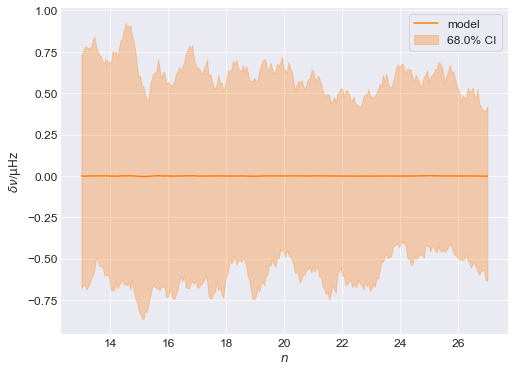

In [11]:
ast.plot_glitch(prior_data, group='prior');

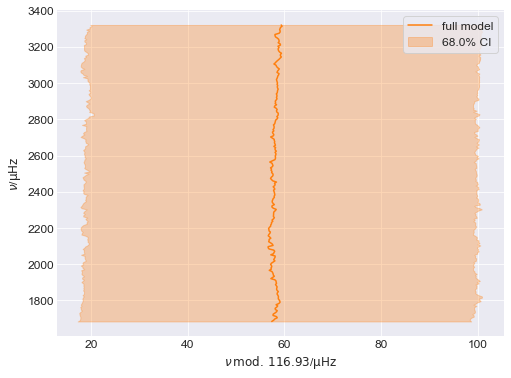

In [12]:
ast.plot_echelle(prior_data, group='prior');

In [13]:
infer.sample()
infer.posterior_predictive()
data = infer.get_data()

Running nested sampling using the 'multi_ellipsoid' sampler with 100 live points and 100000 maximum samples...
Completed in 12.6 seconds.


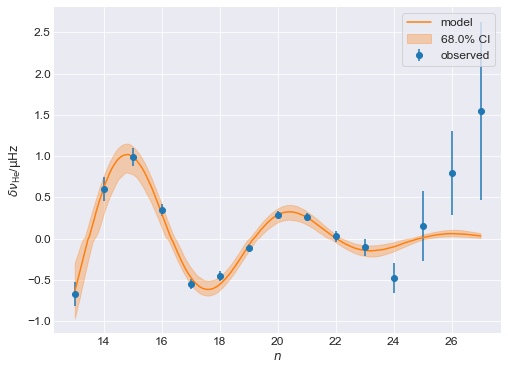

In [14]:
ast.plot_glitch(data, kind='He');

(-0.1, 0.1)

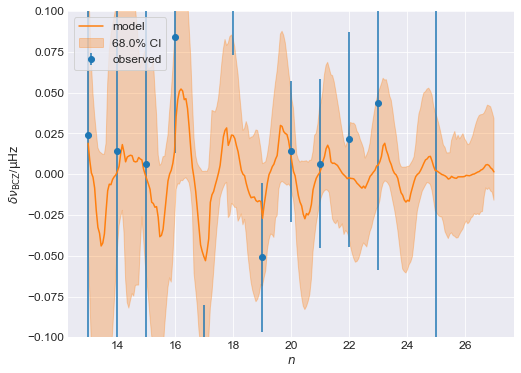

In [15]:
ax = ast.plot_glitch(data, kind='CZ')
ax.set_ylim(-0.1, 0.1)

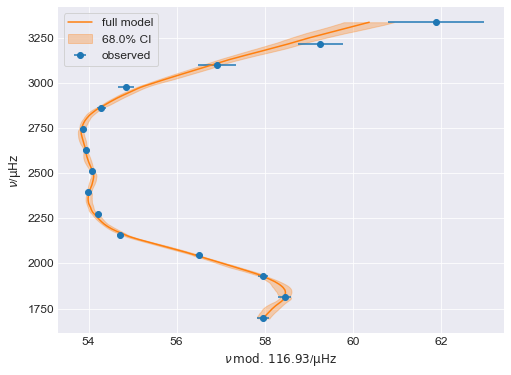

In [16]:
ast.plot_echelle(data);

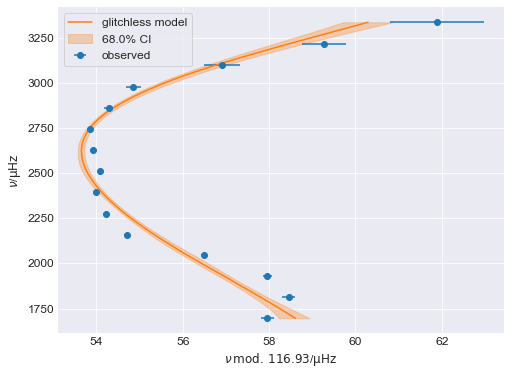

In [17]:
ast.plot_echelle(data, kind='glitchless');

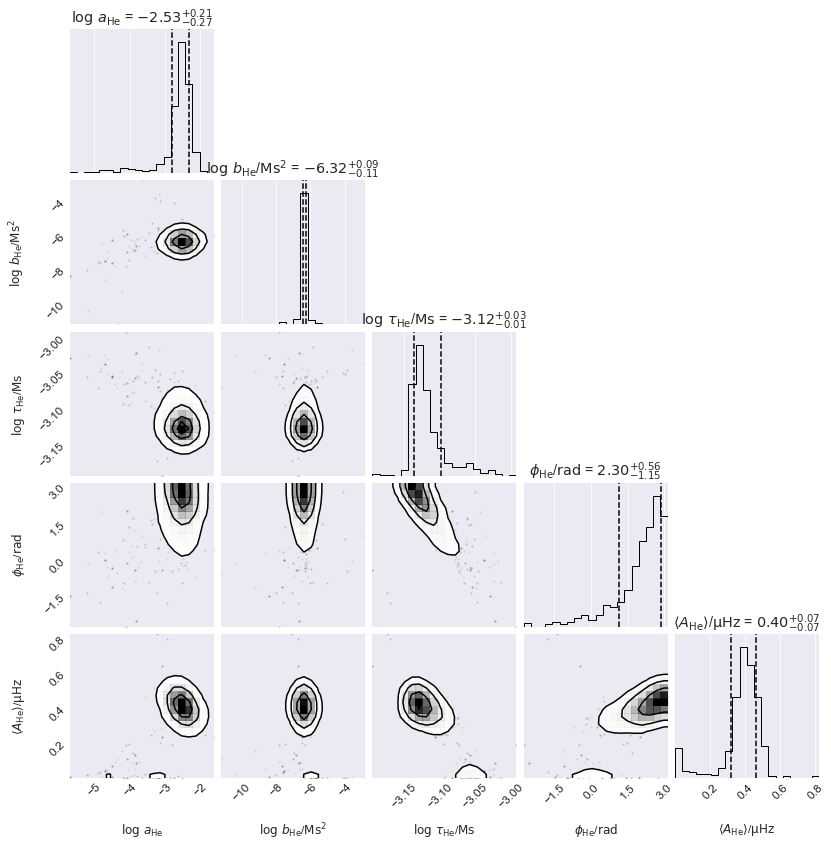

In [18]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

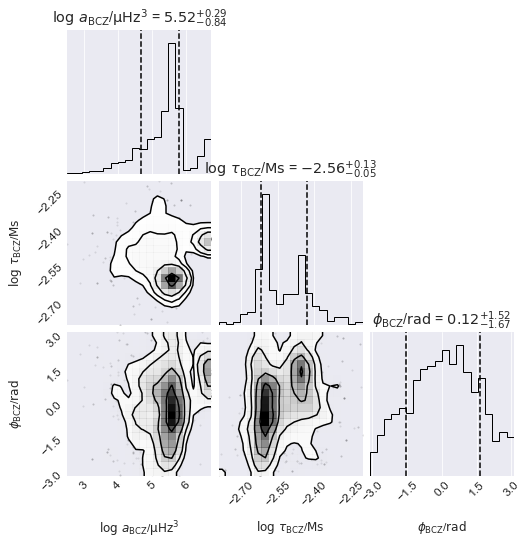

In [20]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz']);